An initial analysis
===================
An initial analysis of the data.json.

The questions that are answered are the following:
    1. Provenance
    2. Years

In [246]:
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
import pandas as pd
import collections
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in data
df = pd.read_json('data.json')

In [3]:
df.describe()

,date
count,9522.000000
mean,2008.947175
std,6.151882
min,1847.000000
25%,2007.000000
50%,2010.000000
75%,2013.000000
max,2017.000000


In [4]:
len(df['title'].unique()), len(df['unique_key'].unique())

(1081, 1115)

Tables
======

# 1. Provenance

From which APIs the articles came from?

In [5]:
df.groupby(['unique_key', 'provenance']).size().reset_index().groupby('provenance').size()

provenance
IEEE        253
Nature       27
PLOS         61
Springer    316
arXiv       458
dtype: int64

# 2. Key words
The most used key words

Before analysing the key words all must be lower case.

In [6]:
df.key_word = df.key_word.str.lower()

In [64]:
df.groupby(['unique_key', 'key_word']).size().reset_index().groupby('key_word').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


key_word
none                                  862
game theory                           205
games                                 106
evolutionary computation               73
nash equilibrium                       37
thin film transistors                  37
multi-agent systems                    37
iterative methods                      36
statistics                             35
computer science                       32
sociology                              31
evolution (biology)                    30
genetic algorithms                     27
biological system modeling             25
computational modeling                 24
learning (artificial intelligence)     24
decision making                        21
educational institutions               20
mathematical model                     20
automata                               19
costs                                  19
humans                                 19
neural networks                        17
finite state machines    

Irrelevant key words: 
---------------------

There is a list of words that are irrelevant with the PD and the articles themselves. *note: Key words come from IEEE and Nature only.* 
Such as:
- Thin Film Transistors
- Toy industry
- Elements (Helium, Gold, Nickel, Manganese)
- Mirrors
- Bishmuth

After a bit of searching I believe IEEE uses a kind of nature launguage process for it keywords. 
For examples:

- Thin film Transistors: http://ieeexplore.ieee.org/document/725486/. Though neither in the title or abstract the key word makes no sense, in the article the word TFT is continuously repeated. 
- Helium: http://ieeexplore.ieee.org/document/5333456/. Because the words 'EEG' and 'Helium' are often studied together


None: 
-----

Just by reading abstracts I have manually filled in a few labels fields. 
If natural language process allow us to match titles-abstract with labels we created most work done by key words can be replaced by labels and the amount of none should not affect us.

# 3. Labels
As an example. We are not there yet with the labels.

In [68]:
df.groupby(['unique_key', 'labels']).size().reset_index().groupby('labels').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


labels
None                     1029
For general knowledge      31
Spatial Tournament         17
Evolution                  17
Social                     10
Strategy                    6
Economics                   4
Automaton                   3
Decision theory             3
Optimazation                3
Neural network              3
Healthcare                  2
Zero determinant            2
Noise                       2
Simulation                  2
Multigames                  2
Markov process              1
Lattice                     1
Memory                      1
Finite memory               1
Risk                        1
Sequential                  1
Continuous                  1
dtype: int64

# 4. Titles

While looking at the db words in the titles such as:

- social
- spatial
- network
- evolution
- decision
- newcomb
- noise

did stand out. 

In [69]:
# get unique titles in a list
words_from_titles = df.title.str.lower().unique()
# split the words into a list
words_from_titles = [item.split(' ') for item in words_from_titles]
words_from_titles = [item for sublist in words_from_titles for item in sublist]
# remove words with maximum 3 letters('of', 'a', 'and')
words_from_titles = [item for item in words_from_titles if len(item) > 3]

In [70]:
counter = collections.Counter(words_from_titles)

In [71]:
counter.most_common()

[('dilemma', 533),
 ("prisoner's", 319),
 ('cooperation', 211),
 ('game', 205),
 ('prisoner’s', 184),
 ('iterated', 141),
 ('games', 135),
 ('with', 131),
 ('networks', 85),
 ('strategies', 83),
 ('evolutionary', 82),
 ('evolution', 80),
 ('spatial', 75),
 ('strategy', 52),
 ('quantum', 48),
 ('social', 46),
 ('model', 41),
 ('based', 38),
 ('repeated', 36),
 ('cooperative', 36),
 ('dynamics', 36),
 ('learning', 36),
 ('network', 34),
 ('analysis', 32),
 ("prisoners'", 31),
 ('behavior', 31),
 ('using', 31),
 ('theory', 31),
 ('emergence', 31),
 ('tit-for-tat', 30),
 ('agents', 27),
 ('dilemma:', 27),
 ('from', 27),
 ('memory', 25),
 ('effects', 25),
 ('under', 24),
 ('groups', 23),
 ('dynamic', 21),
 ('structure', 21),
 ('dilemmas', 21),
 ('study', 20),
 ('between', 19),
 ('prisoners’', 19),
 ('effect', 19),
 ('promotes', 18),
 ('stochastic', 18),
 ('selection', 18),
 ('approach', 18),
 ('solution', 17),
 ('problem', 17),
 ('information', 15),
 ('interaction', 15),
 ('population', 15)

# 5. Authors

In [169]:
df.author = df.author.str.lower()

In [172]:
df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


author
matjaz perc              27
attila szolnoki          25
none                     20
long wang                17
gyorgy szabo             15
zhen wang                13
daniel ashlock           13
angel sánchez            11
zhi-xi wu                11
xiaojie chen             10
zhihai rong              10
azhar iqbal               9
krishnendu chatterjee     9
dirk helbing              9
josé a. cuesta            8
hisao ishibuchi           8
yusuke nojima             8
martin a. nowak           7
y. moreno                 7
derek abbott              7
j. gomez-gardenes         7
jeffrey tsang             7
feng fu                   7
yamir moreno              6
naoki masuda              6
eun-youn kim              6
jeromos vukov             6
jiawei li                 6
valerio capraro           6
takahiko sudo             6
                         ..
moore                     1
nataliya e. chorna        1
moore  marian chapman     1
moreno  yamir             1
morfeld  p.  

We can also look at Authors and key words. This can show us whether an author jumped field or even 
indintify topics within the IPD which are strongly related.


In [275]:
authors_field =df[df['key_word'] != 'none'].groupby(['unique_key', 'author', 'key_word']).size().reset_index().groupby(['author', 'key_word']).size()
authors_field = pd.DataFrame(authors_field)
authors_field

0
author        key_word                            
a. acan       ant colony optimization            1
              application software               1
              artificial life                    1
              biological system modeling         1
              biology                            1
              computer science                   1
              game theory                        1
              games of skill                     1
              genetic algorithms                 1
              linear matrix inequalities         1
              resists                            1
              robustness                         1
a. coelho     automation                         1
              clustering algorithms              1
              costs                              1
              distributed control                1
              distributed shared memory systems  1
              distribution strategy              1
              laboratories                       1
              nearest neighbor searches          1
              parallel algorithms                1
              personal communication networks    1
              processor scheduling               1
              rendering (computer graphics)      1
              resource allocation                1
              scientific computing               1
              systems engineering and theory     1
              workstation clusters               1
a. colosimo   brain modeling                     1
              cognition                          1
...                                             ..
zhuozheng li  history                            1
              humans                             1
              lattice theory                     1
              lattices                           1
              matrix algebra                     1
              nash equilibrium                   1
              network theory (graphs)            1
              numerical simulation               1
              organisms                          1
zichuan xu    algorithm design and analysis      1
              game theory                        1
              games                              1
              multicore processing               1
              multiprocessing systems            1
              processor scheduling               1
              radiation detectors                1
              scheduling                         1
özgün töreyen cities and towns                   1
              clustering algorithms              1
              europe                             1
              gallium                            1
              game theory                        1
              games                              1
              genetic algorithms                 1
              multi-agent systems                1
              multiagent systems                 1
              optimization                       1
              pattern clustering                 1
              simulated annealing                1
              travelling salesman problems       1

[5879 rows x 1 columns]

Plots
=====

# 6. Years

Happy to see older articles as well. 

Two outliers: 1847, 1957. From 1966 there is a contunious trend.

In [12]:
num_articles_per_year = df.groupby('date').size()

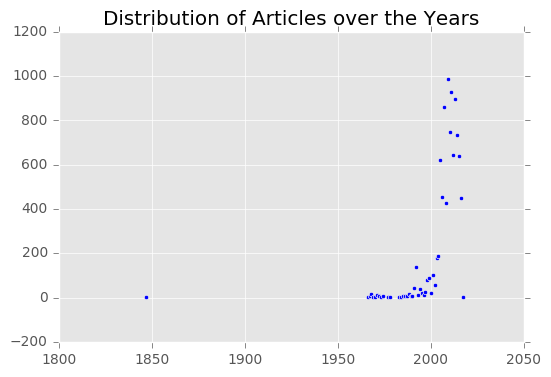

In [13]:
plt.figure();
plt.title("Distribution of Articles over the Years")
pylab.scatter(num_articles_per_year.index, num_articles_per_year, s=10)

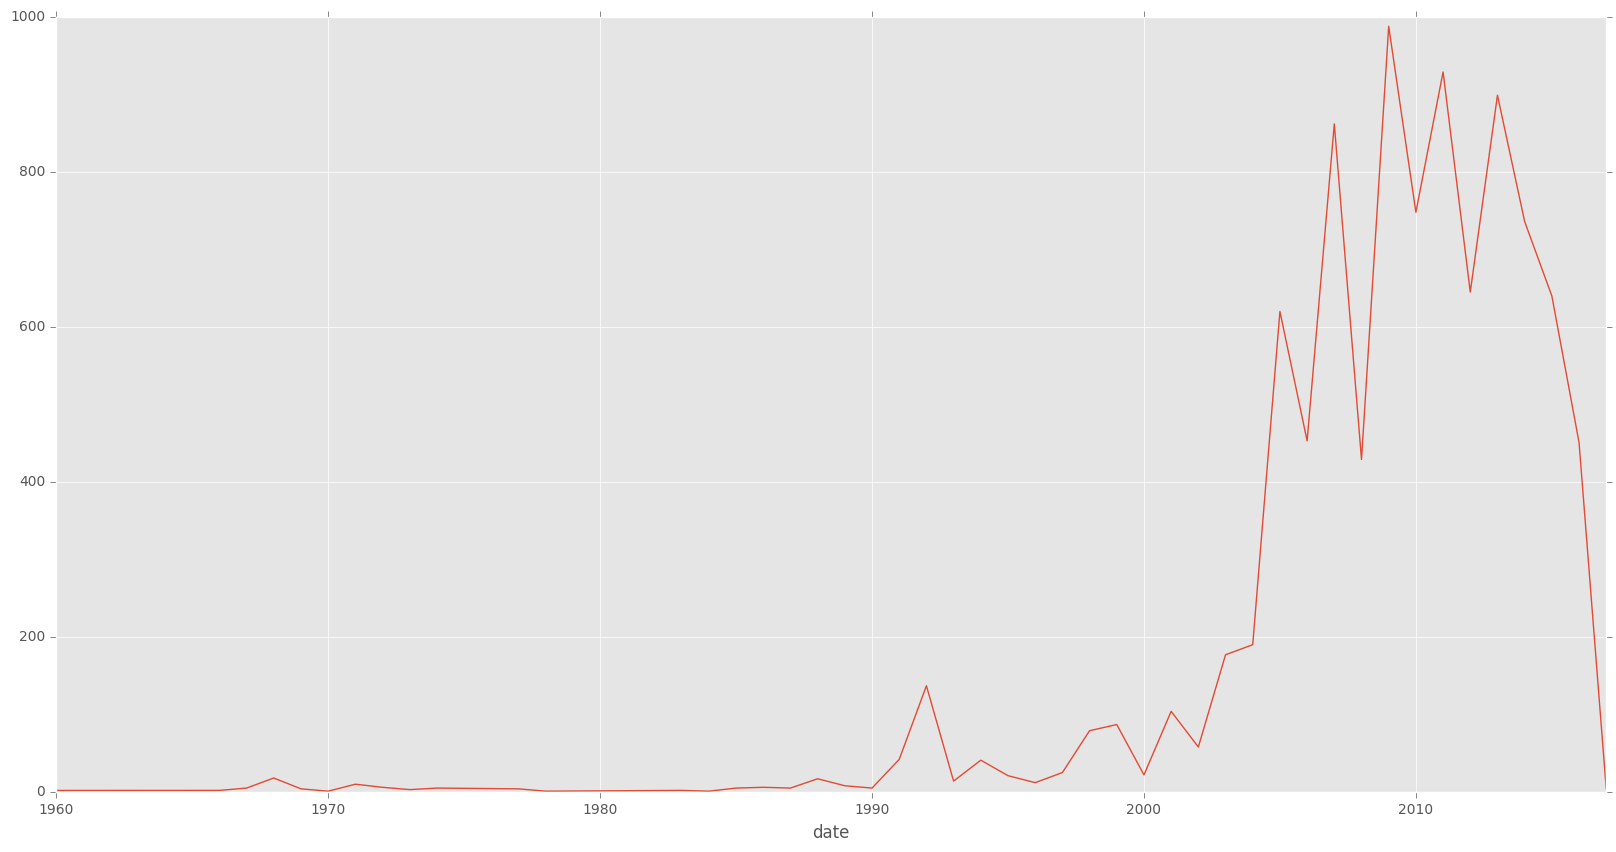

In [278]:
fig = figure(figsize=(20, 10))
num_articles_per_year.plot(xlim=1960)

# 7. Trends

Are seperated as:

- Key words with articles per year

- Lables with articles per year

- Author with articles per year

In [210]:
years = list(range(1966, 2017))

# 7.1 Key words

In [159]:
key_word_freq = df.groupby(['unique_key', 'key_word']).size().reset_index().groupby('key_word').size()
mst_freq = key_word_freq[key_word_freq >= 10].keys()
mst_freq = mst_freq.drop('none', 'thin film transistors')
key_word_trend =df[df['key_word'].isin(mst_freq)].groupby(['unique_key', 'key_word', 'date']).size().reset_index().groupby(['key_word', 'date']).size()
key_word_trend = pd.DataFrame(key_word_trend)

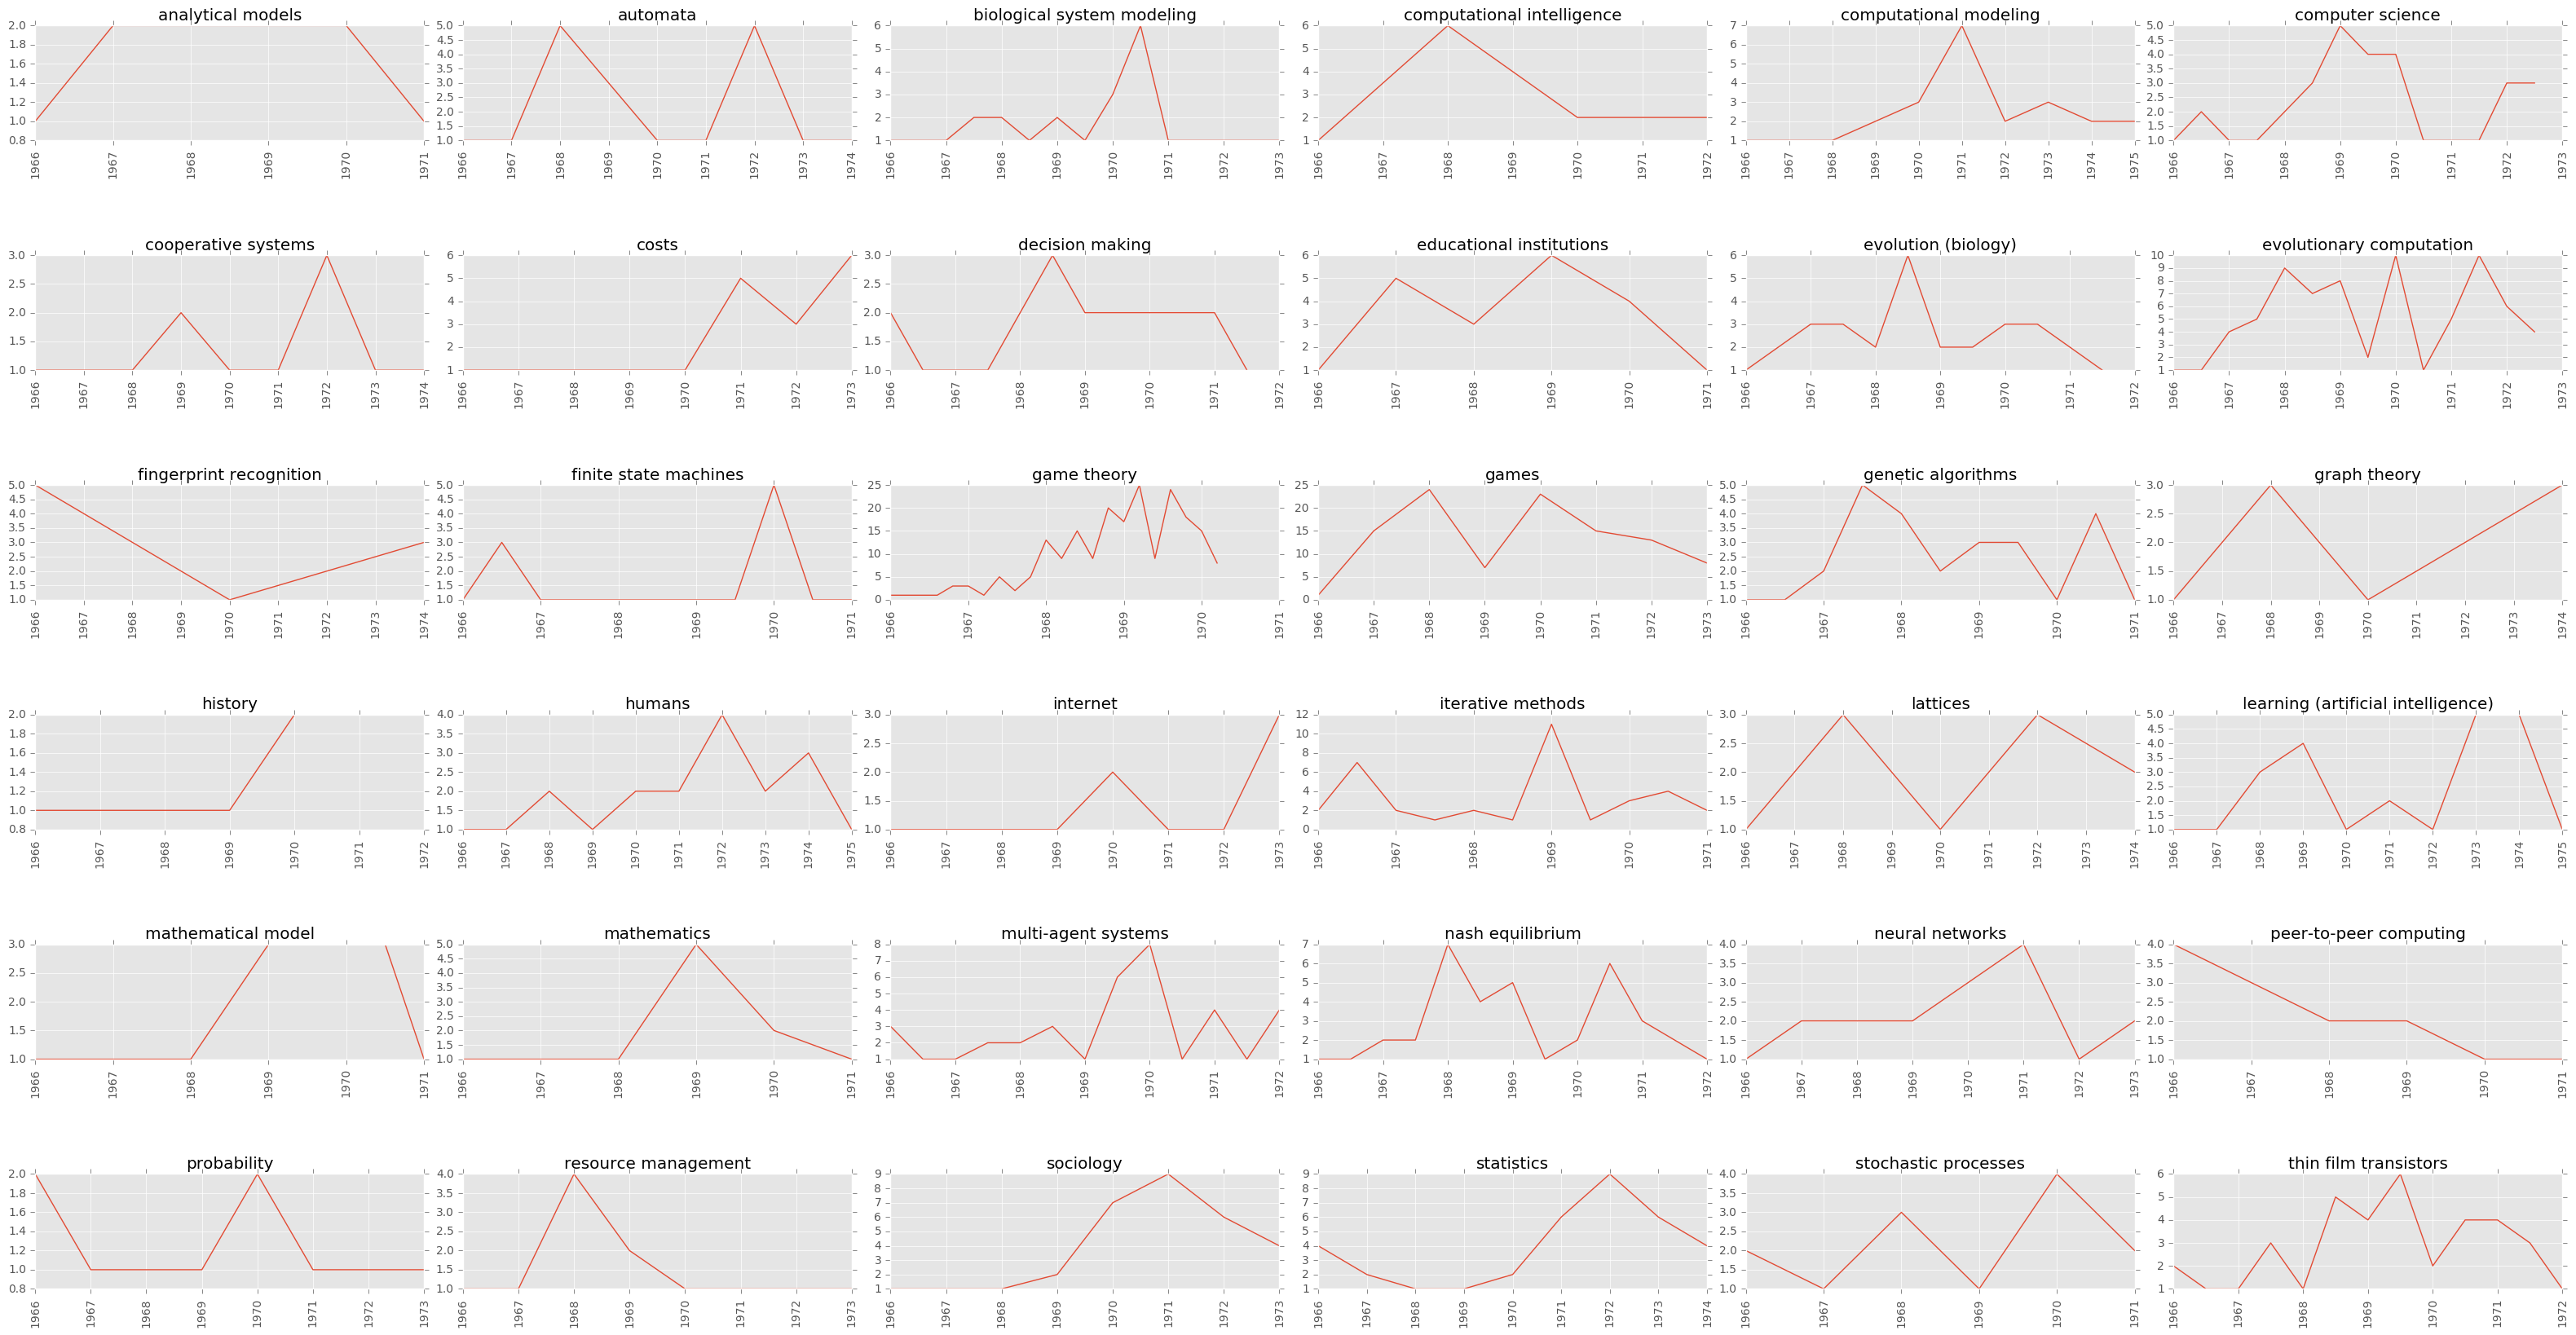

In [211]:
fig, axs = plt.subplots(6,6, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 0

for groupID, data in key_word_trend.groupby(level='key_word'):

    axs[i].plot(data.values.ravel())
    axs[i].set_xticklabels(years, rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1

# 7.2 Labels

Again labels will have more to say once the natural language process does the matching. 

In [165]:
labels_trend =df.groupby(['unique_key', 'labels', 'date']).size().reset_index().groupby(['labels', 'date']).size()
labels_trend = pd.DataFrame(labels_trend)

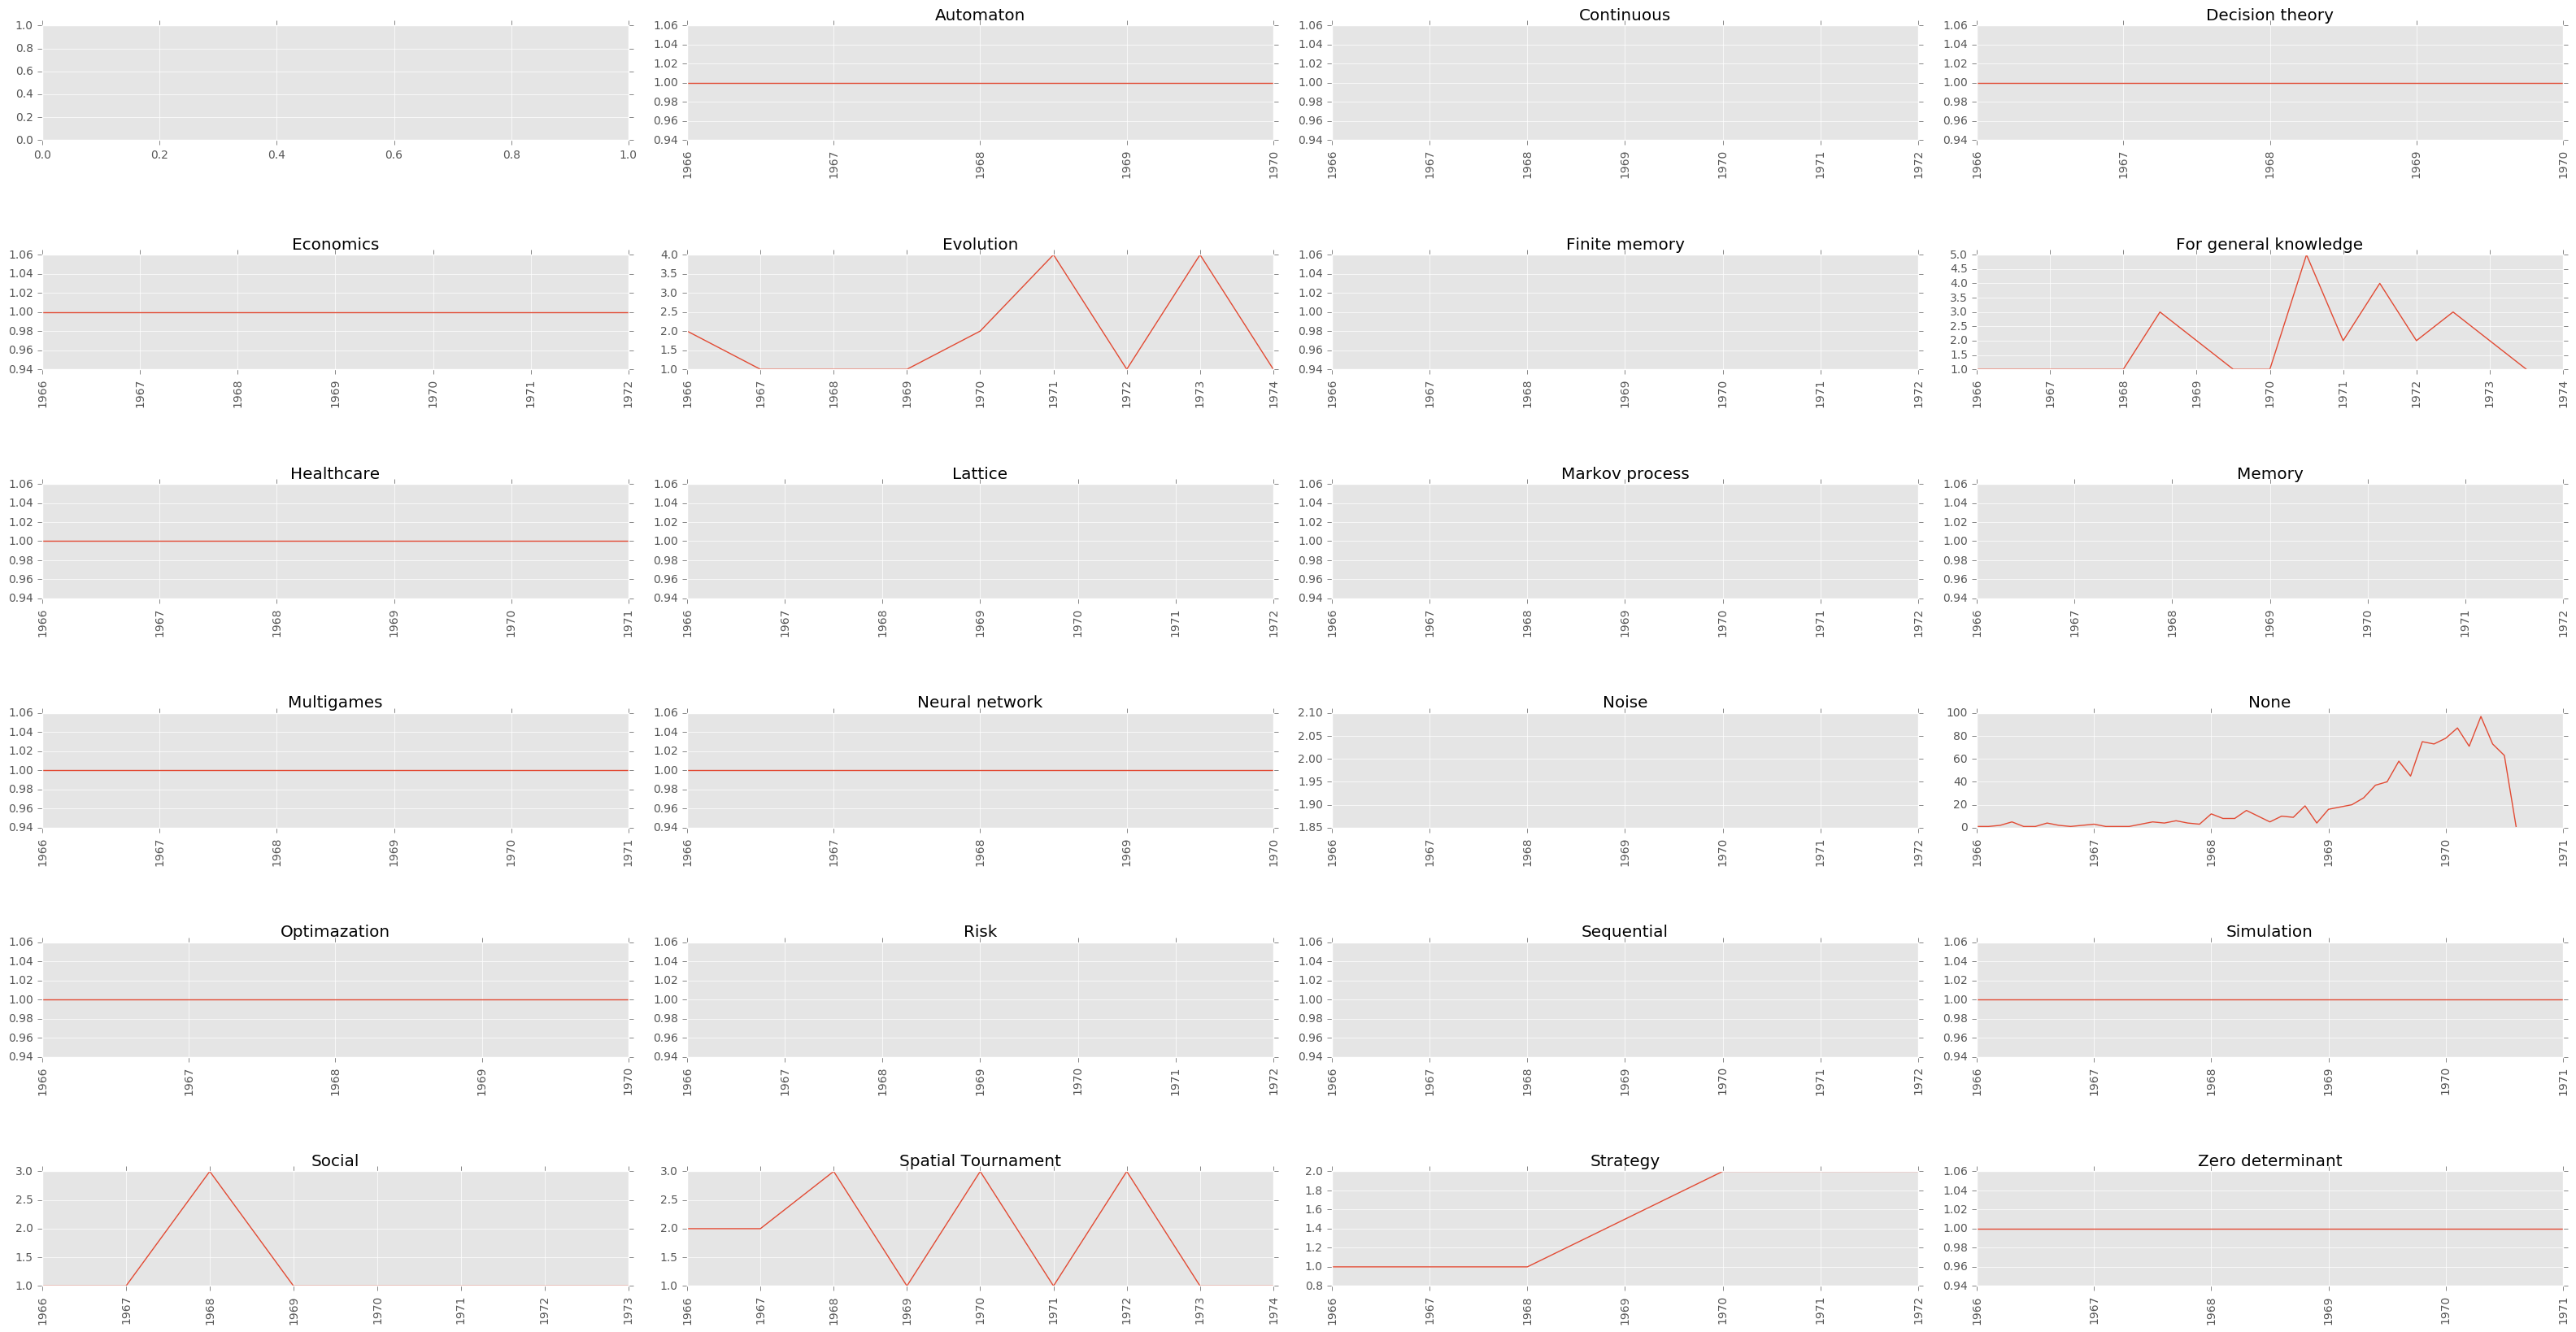

In [212]:
fig, axs = plt.subplots(6,4, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 1

for groupID, data in labels_trend.groupby(level='labels'):

    axs[i].plot(data.values.ravel())
    axs[i].set_xticklabels(years, rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1

# 7.3 Authors

Authors with number of article can show us the productivity of an author.

**Note** that the following example is only for the most activate authors within the db. This can be expand
to all the authors.

In [187]:
authors_freq = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()
mst_freq = authors_freq[authors_freq >= 5].keys()
mst_freq = mst_freq.drop('none')
authors_prod =df[df['author'].isin(mst_freq)].groupby(['unique_key', 'author', 'date']).size().reset_index().groupby(['author', 'date']).size()
authors_prod = pd.DataFrame(authors_prod)

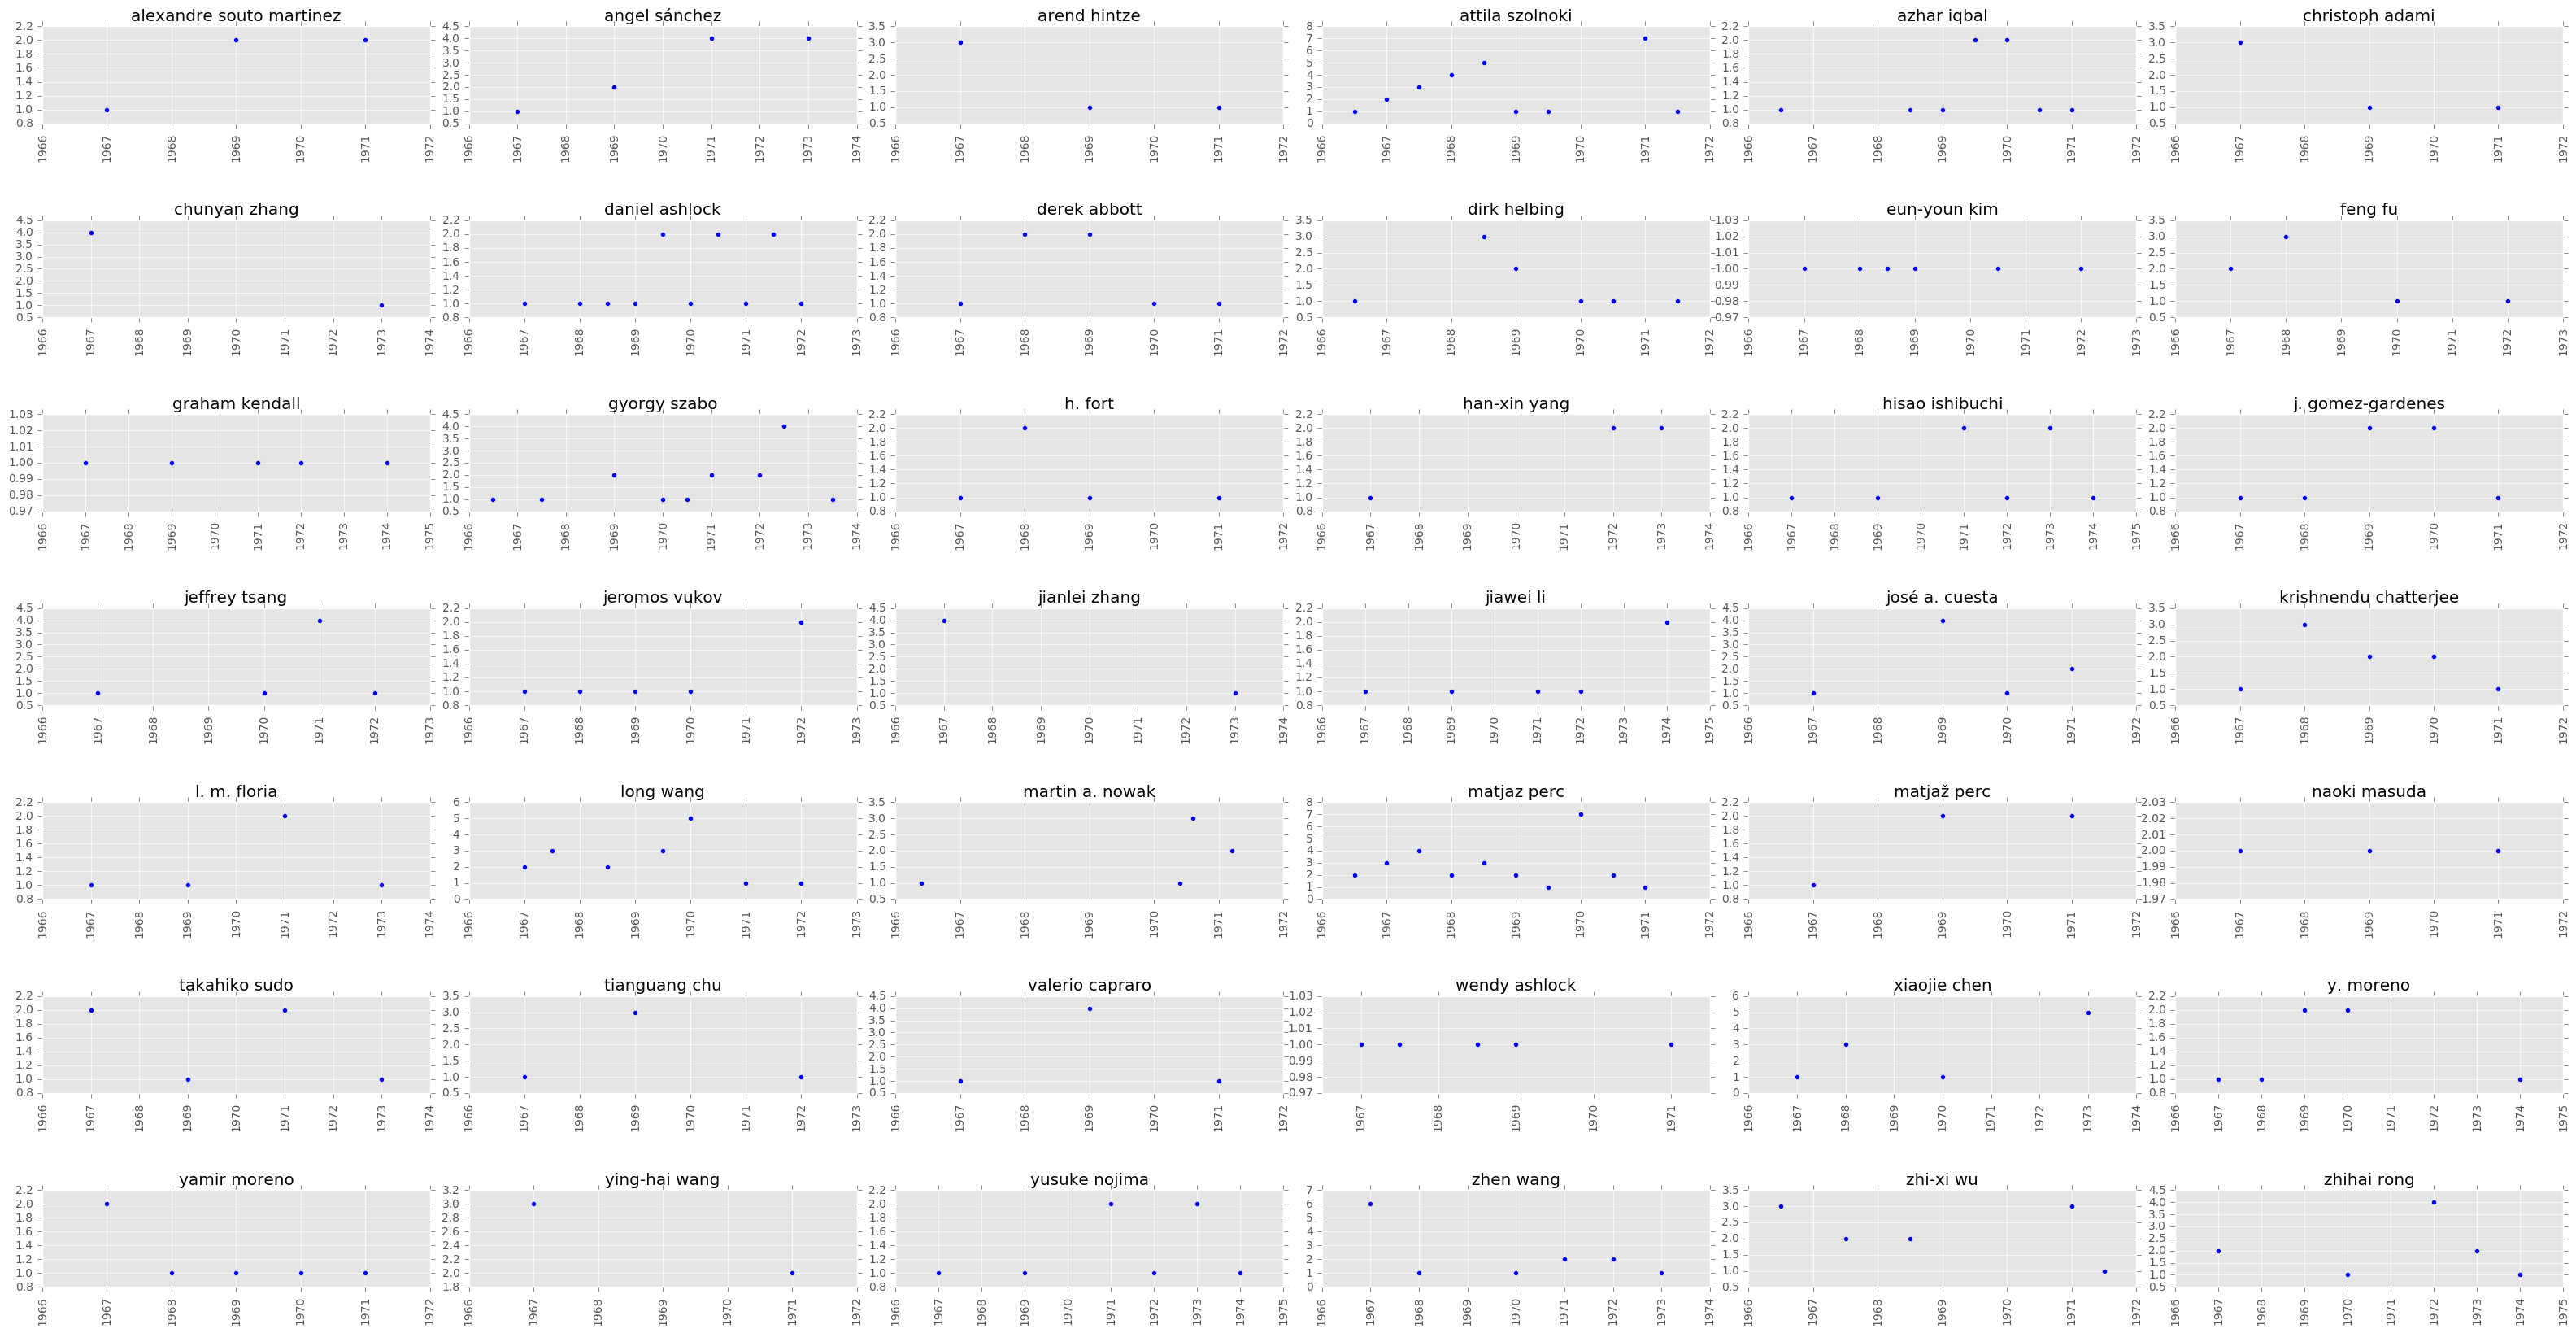

In [209]:
fig, axs = plt.subplots(7,6, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)
axs = axs.ravel()
i = 0

for groupID, data in authors_prod.groupby(level='author'):
    
    x = data.index.get_level_values('date')
    y = data.values.ravel()
    axs[i].scatter(x, y )
    axs[i].set_xticklabels(years, rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1

In [294]:
k = ['nowak' in name for name in df.author]
df[k]

,abstract,author,date,journal,key,key_word,labels,list_strategies,pages,provenance,read,score,title,unique_key
1065,Direct reciprocity is a mechanism for the evol...,martin a. nowak,2013,PLoS ONE,Hilbe2013,none,None,None,None,PLOS,None,0.92858446,Adaptive Dynamics of Extortion and Compliance,1df60a5fe4a085641fceccad047a517c
2554,Evolutionary game dynamics are often studied i...,martin a. nowak,2016,"Journal of Theoretical Biology (2016), pp. 143...",Kaveh2016,none,None,None,None,arXiv,None,None,Games of multicellularity,4a2fb41dd1a421c51034274e2faf62e7
4158,Direct reciprocity is a mechanism for the evol...,martin a. nowak,2016,"Sci. Rep. 6, 25676 (2016)",Baek2016,none,None,None,None,arXiv,None,None,Comparing reactive and memory-one strategies o...,6ed069baab06300996ef3f6b84fcd4ee
5022,The evolution of reactive strategies for repea...,martin nowak,1990,Acta Applicandae Mathematica,Nowak1990,none,None,None,None,Springer,None,None,The evolution of stochastic strategies in the ...,8303ec9a659bcf5cd287f309c967131f
5843,"Cooperative behavior, where one individual inc...",martin a. nowak,2013,arXiv,Zagorsky2013,none,None,None,None,arXiv,None,None,Forgiver triumphs in alternating Prisoner's Di...,92b94992f9ad26920ab120c307c210d6
8504,The simple 'prisoner's dilemma' is a game with...,martin a. nowak,1992,Nature Publishing Group,Nowak1992,none,None,None,None,Nature,None,None,Tit for tat in heterogeneous populations,e35981b14f1224f9ee30f66d29e0d4e8
8950,"Cooperative behavior, where one individual inc...",martin a. nowak,2013,PLoS ONE,Zagorsky2013,none,Automaton,None,None,PLOS,None,4.445462,Forgiver Triumphs in Alternating Prisoner's Di...,f00732f90a8579ced46e5810434e871f
908,<p>Two players engaged in the Prisoner's Dilem...,martin nowak,1993,Nature Publishing Group,Nowak1993,none,None,None,None,Nature,None,None,"A strategy of win-stay, lose-shift that outper...",1a17155cd3f29b9efa8a1750eee4c654
9300,Iterated games are a fundamental component of ...,martin a. nowak,2012,arXiv,Hilbe2012,none,None,None,None,arXiv,None,None,The Evolution of Extortion in Iterated Prisone...,f742938a3ccce3a6c5191cee9bea03ef


In [282]:
k = 'nowak alexandra'

In [283]:
'nowak' in k

True